# <center> Matemática para Data Science </center>

## Transformações Lineares em Visão Computacional

In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

### Carregando e Visualizabdo Imagem

In [4]:
# Criando um objeto para Carregar a imagem
img = cv2.imread("C:/Users/SAMSUNG/Downloads/Nova pasta/imagem.png")

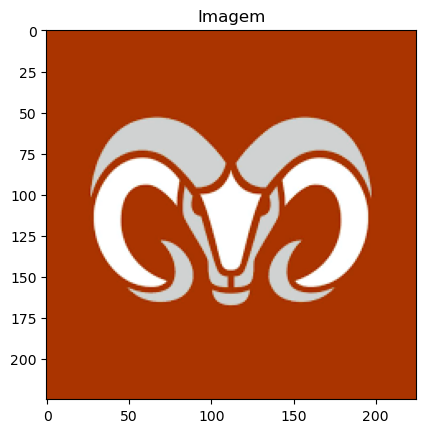

In [5]:
# Visualiza a imagem
plt.imshow(img)
plt.title('Imagem')
plt.show()

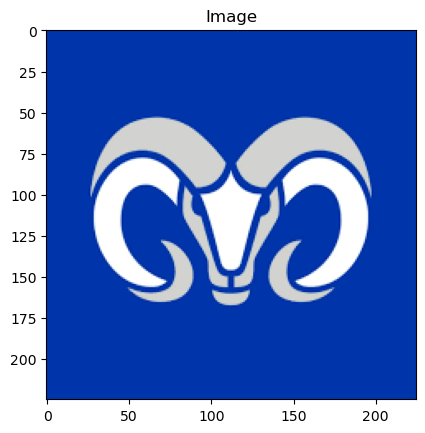

In [6]:
# Carrega a imagem com as cores originais
img_colorida = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_colorida)
plt.title('Image')
plt.show()

A imagem é composta por meio de uma matriz, com seus elementos no eixo x e no eixo y

In [13]:
print(img_colorida.shape)
# 225 elementos(pixels) no eixo "x"
# 225 elementos(pixels) no eixo "y"
# 3 Dimensões(cores) "RGB"

(225, 225, 3)


In [14]:
h, w, c = img_colorida.shape
print('Altura (Pixels):', w)
print('Largura (Pixels):', h)
print('Canais de Cores:', c)

Altura (Pixels): 225
Largura (Pixels): 225
Canais de Cores: 3


In [15]:
# Criando uma Função para visualizar a imagem
def cv2_imshow(imagem):
    color = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    plt.imshow(color)
    plt.title('Image')
    plt.show()

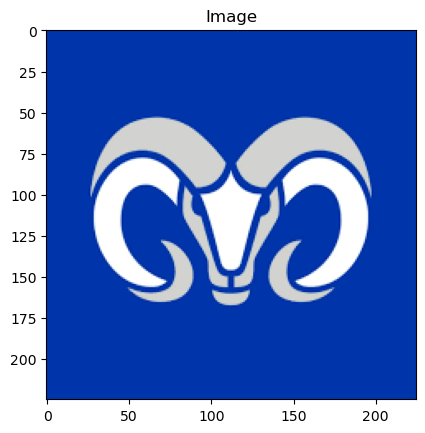

In [16]:
cv2_imshow(img)

## Rotacionando a Imagem via Transformação Linear

In [17]:
# Criar Função para rotacionar a imagem
# Esta função será a receptora da imagem, que irá prepara lá, para ser rotacionada 
def rotacao_imagem(img, matriz):
    
    # Cria uma matriz, com o mesmo shape da matriz da imagem original, mas preenchida com zeros
    # Esta irá servir como Base
    fImg = np.zeros(img.shape, dtype = np.uint8)
    
    # Loop, pelo índice e pelo valor de cada pixel da imagem, no sentido das linhas
    for i, row in enumerate(img):
        
        # Loop, pelo índice e pelo valor de cada pixel da imagem, no sentido das colunas
        for j, col in enumerate(row):
            
            # Extrair o valor do pixel e salvar para usar depois
            pixel_data = img[i, j, :]
            
            # Gerar um array com as coordenadas
            input_coords = np.array([i, j, 1])
            
            # Multiplicação da matriz recebida, como argumento, pelo array de coordenadas
            # Aqui ocorre a transformação linear
            newx, newy, _ = np.floor(matriz @ input_coords).astype(int)
            
            # Condicional
            # Se o shape do novo array for diferente do array original, transfere os pixels para o novo array
            if((newx != fImg.shape[0]) & (newy != fImg.shape[1])):
                fImg[newx, newy, :] = pixel_data 
    
    # Imprime a imagem
    cv2_imshow(fImg)
    
    return fImg

In [20]:
# Criar Função para aplicar a rotação desejada
# Esta função irá definir quais as coordenadas que a imagem irá se rotacionar
def aplica_rotacao_imagem(img):
    
    # Matriz com as coordenadas para girar a imagem(Coordenada Desejada)
    matriz = np.array([[-1,0,0],[0,1,0],[0,0,1]])
    
    # Executa a função passando o vetor como parâmetro
    flipped = rotacao_imagem(img, matriz)

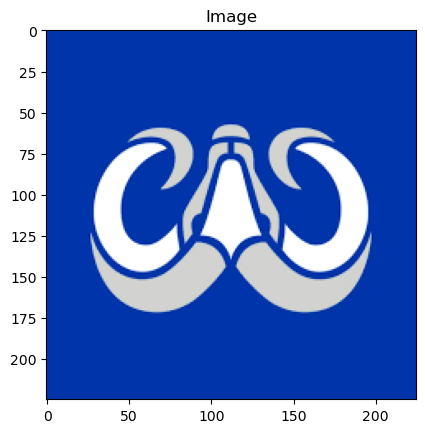

In [21]:
# Visualizando a imagem após aplicar a função
aplica_rotacao_imagem(img)

## Deslocando a Imagem via Transformação Linear

In [26]:
# Cria função com a matriz para a transformação linear
def tMatrix(tx, ty):
    
    # Matriz para a transformação linear
    Matrix = np.array([[1, 0, tx],[0, 1, ty]])
    
    return Matrix

In [34]:
# Função para fazer a translação da imagem
def desloca_imagem(img, tx, ty):
    
    # Extrai altura e largura da imagem
    height, width = img.shape[:2]
    
    # Cria a matriz para a transformação linear
    M = tMatrix(tx, ty)
    
    # Cria o array com o mesmo shape da imagem mas preenchido com zeros
    imgtr = np.zeros(img.shape, dtype = 'u1')
    
    # Loop pela altura
    for i in range(height):
        
        # Loop pela largura
        for j in range(width):
            
            # Extrai as coordenadas
            originx = j
            originy = i
            
            # Cria o array de coordenadas
            originxy = np.array([originx, originy, 1])
            
            # Multiplica a matriz da transformação pela matriz das coordenadas
            # Aqui ocorre a transformação linear
            newxy = np.dot(M, originxy)
            
            # Gera as novas coordenadas
            newx = newxy[0]
            newy = newxy[1]

            # Grava os pixels no array com as novas coordenadas
            if 0 < newx < width and 0 < newy < height:
                imgtr[newy,newx] = img[i,j]
                
    return imgtr

In [37]:
# Tupla com algumas combinações para testar o deslocamento
valores = ((10,10), (80,0), (150,150))


Deslocamento da imagem com essa combinação de pixels: (10, 10)


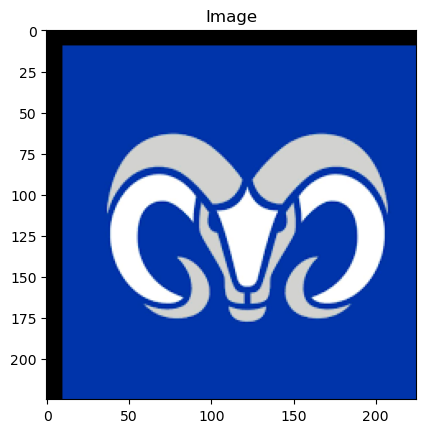


Deslocamento da imagem com essa combinação de pixels: (80, 0)


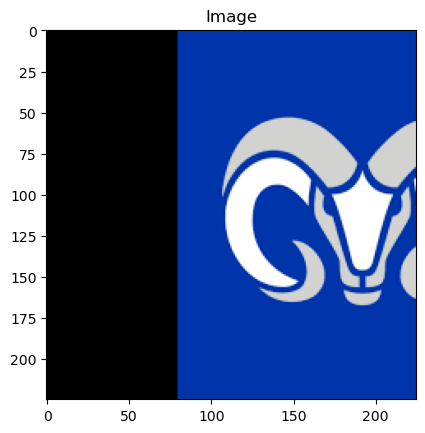


Deslocamento da imagem com essa combinação de pixels: (150, 150)


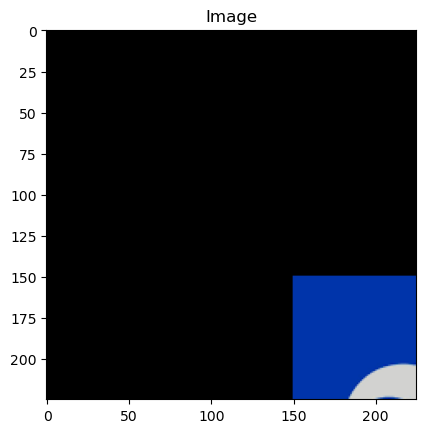

In [38]:
# Deslocamento da imagem no plano com diferentes valores
for valor in valores:
    tx = valor[0]
    ty = valor[1]
    trimg = desloca_imagem(img, tx, ty)
    print('\nDeslocamento da imagem com essa combinação de pixels:', valor)
    cv2_imshow(trimg)

## Alterando a Escala via Transformação Linear

In [39]:
# Cria função com a matriz paara a transformação linear
def sMatrix(ex, ey):
    
    # Matriz
    Matrix = np.array([[ex, 0, 0],[0, ey, 0]]) # kernel
    
    return Matrix

In [40]:
# Função para modificar a escala via transformação linear
def altera_escala(img, ex, ey):
    
    # Extrai altura, largura e canais de cores
    height, width, chns = img.shape

    # Cria a matriz da transformação
    M = sMatrix(ex, ey)
    
    # Cria matriz de zeros
    escimg = np.zeros(img.shape, dtype = 'u1')
  
    # Loop pela altura
    for i in range(height):
        
        # Loop pela largura
        for j in range(width):
            
            # Extrai as coordenadas
            originx = j
            originy = i
            
            # Cria array de coordenadas com 1 dimensão
            originxy = np.array([originx, originy, 1])
          
            # Multiplica as matrizes
            newxy = np.dot(M, originxy)
            
            # Novas coordenadas
            newx = int(newxy[0])
            newy = int(newxy[1])

            # Transfere os pixels para a imagem com as novas coordenadas
            escimg[newy,newx] = img[i,j]
            
    return escimg

In [41]:
# Tupla de combinações para testar a escala da imagem
valores = ((1,1), (0.8,0.8), (0.5,0.5))


Escala da imagem alterada para esses valores: (1, 1)


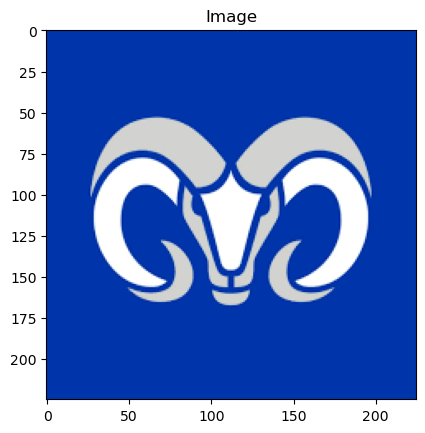


Escala da imagem alterada para esses valores: (0.8, 0.8)


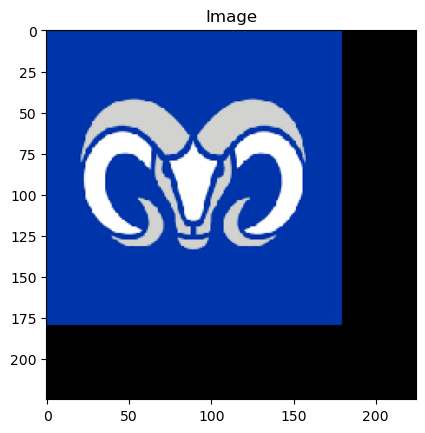


Escala da imagem alterada para esses valores: (0.5, 0.5)


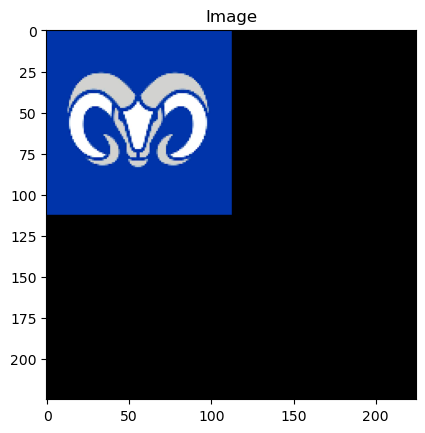

In [42]:
# Altera a escala da imagem com diferentes valores
for valor in valores:
    ex = valor[0]
    ey = valor[1]
    print('\nEscala da imagem alterada para esses valores:', valor)
    escaimg = altera_escala(img, ex, ey)
    cv2_imshow(escaimg)